In [2]:
import numpy as np
import pandas as pd
import skfda
from skfda.representation import FDataGrid
from skfda.inference.anova import oneway_anova
from skfda.datasets import make_gaussian_process

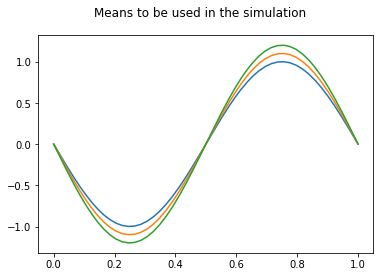

In [3]:
n_samples = 10
n_features = 50
n_groups = 3

t = np.linspace(-np.pi, np.pi, n_features)

m1 = np.sin(t)
m2 = 1.1 * np.sin(t)
m3 = 1.2 * np.sin(t)

_ = FDataGrid([m1, m2, m3],
              dataset_label="Means to be used in the simulation").plot()

In [4]:
def make_process_b_noise(mean, cov, random_state=None):
    return FDataGrid([mean for _ in range(n_samples)]) \
           + make_gaussian_process(n_samples, n_features=mean.shape[0],
                                   cov=cov, random_state=random_state)

In [5]:
sigma = 1
cov = np.identity(n_features) * sigma

fd1 = make_process_b_noise(m1, cov, random_state=1)
fd2 = make_process_b_noise(m2, cov, random_state=2)
fd3 = make_process_b_noise(m3, cov, random_state=3)

In [7]:
oneway_anova(fd1, fd2, fd3, n_sim=100000)

(4.616968659709636, 0.80733)

In [9]:
np.mean([oneway_anova(fd1, fd2, fd3)[1] for _ in range(20)])

0.8088749999999999

In [33]:
sigma = 50
cov = np.identity(n_features) * sigma

fd1 = make_process_b_noise(m1, cov, random_state=1)
fd2 = make_process_b_noise(m2, cov, random_state=2)
fd3 = make_process_b_noise(m3, cov, random_state=3)
x = [_ for _ in range(500, 50001, 500)]
y = []
z = []
for i in x:
    print(f'{i}/{x[-1]}')
    y.append(oneway_anova(fd1, fd2, fd3, n_sim=i, p=1)[1])
    z.append(oneway_anova(fd1, fd2, fd3, n_sim=i, p=2)[1])
    print(y[-1])
    print(z[-1])
    if i % 5000 == 0:
        print('Saving')
        pd.DataFrame({
            "x": x[:len(y)] if len(x) != len(y) else x,
            "y": y
        }).to_csv('anova_data_100k_p1.csv')
        pd.DataFrame({
            "x": x[:len(y)] if len(x) != len(y) else x,
            "y": z
        }).to_csv('anova_data_50k_p2.csv')
        

500/50000
0.998
0.874
1000/50000


KeyboardInterrupt: 

In [36]:
sigma = 1
cov = np.identity(n_features) * sigma

fd1 = make_process_b_noise(m1, cov, random_state=1)
fd2 = make_process_b_noise(m2, cov, random_state=2)
fd3 = make_process_b_noise(m3, cov, random_state=3)

x = [_ for _ in range(500, 50001, 500)]
y = []
z = []
for i in x:
    print(f'{i}/{x[-1]}')
    y.append(oneway_anova(fd1, fd2, fd3, n_sim=i, p=1)[1])
    z.append(oneway_anova(fd1, fd2, fd3, n_sim=i, p=2)[1])
    print(y[-1])
    print(z[-1])
    if i % 5000 == 0:
        '''print('Saving')
        pd.DataFrame({
            "x": x[:len(y)] if len(x) != len(y) else x,
            "y": y
        }).to_csv('csv/anova_50k_p1_sigma10.csv')
        pd.DataFrame({
            "x": x[:len(y)] if len(x) != len(y) else x,
            "y": z
        }).to_csv('csv/anova_50k_p2_sigma10.csv')'''
        continue
        

500/50000
0.002
0.826
1000/50000
0.0
0.794
1500/50000
0.0006666666666666666
0.8033333333333333
2000/50000


KeyboardInterrupt: 

In [16]:
means_p1

0.0

In [ ]:
n_samples = 10
n_features = 50
n_groups = 3

t = np.linspace(-np.pi, np.pi, n_features)

m1 = np.sin(t)
m2 = 1.1 * np.sin(t)
m3 = 1.2 * np.sin(t)

_ = FDataGrid([m1, m2, m3],
              dataset_label="Means to be used in the simulation").plot()

def make_process_b_noise(mean, cov, random_state=None):
    return FDataGrid([mean for _ in range(n_samples)]) \
           + make_gaussian_process(n_samples, n_features=mean.shape[0],
                                   cov=cov, random_state=random_state)

sigma = 100
cov = np.identity(n_features) * sigma
n_samples = 100

fd1 = make_process_b_noise(m1, cov, random_state=1)
fd2 = make_process_b_noise(m2, cov, random_state=2)
fd3 = make_process_b_noise(m3, cov, random_state=3)

p = oneway_anova(fd1, fd2, fd3, p=2, n_sim=50000)[1]
print(p)
p = oneway_anova(fd1, fd2, fd3, p=1, n_sim=50000)[1]
print(p)

0.05322


In [1]:
import numpy as np

import skfda
from skfda.representation import FDataGrid
from skfda.inference.anova import oneway_anova
from skfda.datasets import make_gaussian_process

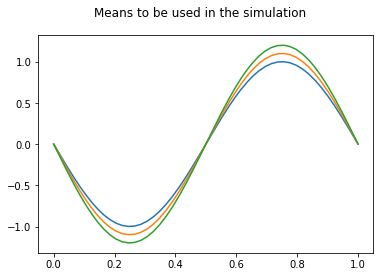

In [2]:
n_samples = 100
n_features = 50
n_groups = 3

t = np.linspace(-np.pi, np.pi, n_features)

m1 = np.sin(t)
m2 = 1.1 * np.sin(t)
m3 = 1.2 * np.sin(t)

_ = FDataGrid([m1, m2, m3],
              dataset_label="Means to be used in the simulation").plot()

In [7]:
def make_process_b_noise(mean, cov):
    return FDataGrid([mean for _ in range(n_samples)]) \
           + make_gaussian_process(n_samples, n_features=mean.shape[0],
                                   cov=cov)

In [4]:
groups = np.full(n_samples * n_groups, 'Sample 1')
groups[100:200] = 'Sample 2'
groups[200:] = 'Sample 3'

In [11]:
sigma = 0.1
cov = np.identity(n_features) * sigma

fd1 = make_process_b_noise(m1, cov)
fd2 = make_process_b_noise(m2, cov)
fd3 = make_process_b_noise(m3, cov)

stat, p_val = oneway_anova(fd1, fd2, fd3, random_state=1)
print("Statistic: ", stat)
print("p-value: ", p_val)
fd1.shape

Statistic:  3.415040947599544
p-value:  0.0


(100,)

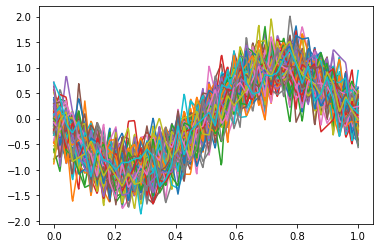

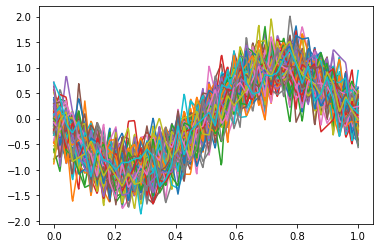

In [13]:
fd1.plot()